**IMPORTS**

In [220]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split.
from sklearn.model_selection import train_test_split

# Import Logistic Regression model.
from sklearn.linear_model import LogisticRegression

# Import metrics.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, RocCurveDisplay, roc_auc_score, recall_score, precision_score, f1_score
from sklearn import metrics
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm

**DATA READING**

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/heart_2022_with_nans.csv')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [224]:
# check for null values
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

**DATA CLEANING**

In [225]:
# drop unnecessary columns and create new dataset
df_clean = df.drop(columns=['State', 'RemovedTeeth', 'LastCheckupTime', 'ChestScan',
                       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap','HighRiskLastYear'])
df_clean.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'CovidPos'],
      dtype='object')

In [226]:
# Encoding columns
df_clean['HadHeartAttack'] = df_clean['HadHeartAttack'].replace({'Yes': 1, 'No': 0}).astype(bool)
df_clean['HadAngina'] = df_clean['HadAngina'].replace({'Yes': 1, 'No': 0}).astype(bool)

# Create a new column that will be our target column
df_clean['HeartDisease'] = np.logical_or(df_clean['HadHeartAttack'], df_clean['HadAngina'])

# Drop old columns
df_clean.drop(columns=['HadHeartAttack', 'HadAngina'], inplace=True)

# Print the shape of the dataframe
print(df_clean.shape)

(445132, 30)


In [172]:
# drop NaN values in target columns
df_clean = df_clean.dropna( subset=['HeartDisease'] )
df_clean.shape
df_clean

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos,HeartDisease
0,Female,Very good,0.0,0.0,No,8.0,No,No,No,No,...,Never smoked,Not at all (right now),"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,False
1,Female,Excellent,0.0,0.0,No,6.0,No,No,Yes,No,...,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,False
2,Female,Very good,2.0,3.0,Yes,5.0,No,No,Yes,No,...,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,Yes,False
3,Female,Excellent,0.0,0.0,Yes,7.0,No,Yes,No,No,...,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,False
4,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,No,...,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Female,Good,0.0,3.0,Yes,6.0,No,Yes,No,No,...,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,False
445128,Female,Excellent,2.0,2.0,Yes,7.0,No,No,No,No,...,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,No,False
445129,Female,Poor,30.0,30.0,No,5.0,No,No,No,No,...,Current smoker - now smokes every day,Use them some days,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,False
445130,Male,Very good,0.0,0.0,No,5.0,No,Yes,No,No,...,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,True


In [173]:
df_clean.describe(include='object')

,Sex,GeneralHealth,PhysicalActivities,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,...,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,CovidPos
count,445132,443934,444039,443575,443359,441989,442913,442320,443206,442499,...,420892,421120,421217,419476,409670,409472,431075,436053,398558,394368
unique,2,5,2,2,2,2,2,2,2,2,...,2,2,2,2,4,4,5,13,2,3
top,Female,Very good,Yes,No,No,No,No,No,No,No,...,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,Yes,No
freq,235893,148444,337559,424336,376665,406504,407257,350910,422891,291351,...,370792,353039,404404,387029,245955,311988,320421,47099,210891,270055


In [164]:
# Print out column and details
for col in df_clean.describe(include='object').columns:
    print('Column Name: ',col)
    print(df_clean[col].unique())
    print('-------------------------------------------------')

Column Name:  Sex
['Female' 'Male']
-------------------------------------------------
Column Name:  GeneralHealth
['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
-------------------------------------------------
Column Name:  PhysicalActivities
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadStroke
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadAsthma
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadSkinCancer
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadCOPD
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadDepressiveDisorder
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadKidneyDisease
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadArthritis
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadDiabete

In [139]:
# Edit details in some columns

df_clean['HadDiabetes'].replace({'No, pre-diabetes or borderline diabetes' : 'Borderline',
                            'Yes, but only during pregnancy (female)' : 'During Pregnancy'} , inplace=True)

df_clean['SmokerStatus'].replace({'Never smoked' : 'Never',
                                        'Current smoker - now smokes some days' : 'Somedays',
                                        'Former smoker' : 'Former',
                                        'Current smoker - now smokes every day' : 'Everyday'}, inplace=True)

df_clean['ECigaretteUsage'].replace({'Not at all (right now)' : 'Not at all',
                                        'Never used e-cigarettes in my entire life' : 'Never',
                                        'Use them every day' : 'Everyday',
                                        'Use them some days' : 'Somedays'}, inplace=True)

df_clean['RaceEthnicityCategory'].replace({'White only, Non-Hispanic' : 'White',
                                             'Black only, Non-Hispanic' : 'Black',
                                             'Other race only, Non-Hispanic' : 'Others',
                                             'Multiracial, Non-Hispanic' : 'Multi Racial'}, inplace=True)

df_clean['AgeCategory'].replace({
    'Age 80 or older' : '80+',
    'Age 75 to 79' : '75-79',
    'Age 70 to 74' : '70-74',
    'Age 65 to 69' : '65-69',
    'Age 60 to 64' : '60-64',
    'Age 55 to 59' : '55-59',
    'Age 50 to 54' : '50-54',
    'Age 45 to 49' : '45-49',
    'Age 40 to 44' : '40-44',
    'Age 35 to 39' : '35-39',
    'Age 30 to 34' : '30-34',
    'Age 25 to 29' : '25-29',
    'Age 18 to 24' : '18-24',}, inplace=True)

df_clean['CovidPos'].replace({'Tested positive using home test without a health professional' : 'Yes'}, inplace=True)

for col in df_clean.describe(include='object').columns:
    print('Column Name: ',col)
    print(df_clean[col].unique())
    print('-------------------------------------------------')

Column Name:  Sex
['Female' 'Male']
-------------------------------------------------
Column Name:  GeneralHealth
['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
-------------------------------------------------
Column Name:  PhysicalActivities
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadStroke
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadAsthma
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadSkinCancer
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadCOPD
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadDepressiveDisorder
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadKidneyDisease
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadArthritis
['No' 'Yes' nan]
-------------------------------------------------
Column Name:  HadDiabete

In [140]:
df_clean.describe(include='object')

,Sex,GeneralHealth,PhysicalActivities,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,...,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,CovidPos
count,445132,443934,444039,443575,443359,441989,442913,442320,443206,442499,...,420892,421120,421217,419476,409670,409472,431075,436053,398558,394368
unique,2,5,2,2,2,2,2,2,2,2,...,2,2,2,2,4,4,5,13,2,2
top,Female,Very good,Yes,No,No,No,No,No,No,No,...,No,No,No,No,Never,Never,White,65-69,Yes,No
freq,235893,148444,337559,424336,376665,406504,407257,350910,422891,291351,...,370792,353039,404404,387029,245955,311988,320421,47099,210891,270055


In [141]:
# drop duplicate rows
df_clean[df_clean.duplicated()]
df_clean.drop_duplicates(inplace=True)

**DISTRIBUTION CHECKING**

In [142]:
# define random impute
def random_impute(series):

    non_missing = series.dropna() # Filter out the non-missing values

    imputed = series.apply(lambda x: np.random.choice(non_missing) if pd.isnull(x) else x) # Impute missing values
    return imputed

Text(0, 0.5, 'Individuals')

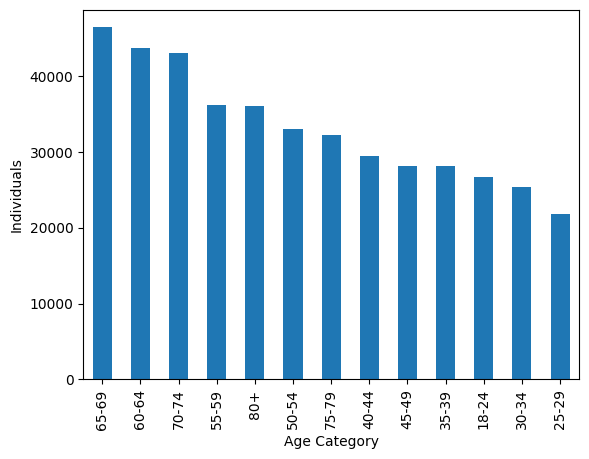

In [143]:
# AgeCategory
df_clean['AgeCategory'].value_counts().plot(kind='bar')
plt.xlabel("Age Category", fontsize=10)
plt.ylabel("Individuals", fontsize=10)

In [144]:
# Input random values and check for nulls
df_clean['AgeCategory'] = random_impute(df_clean['AgeCategory'])
df_clean['AgeCategory'].isnull().sum()

0

Text(0, 0.5, 'Individuals')

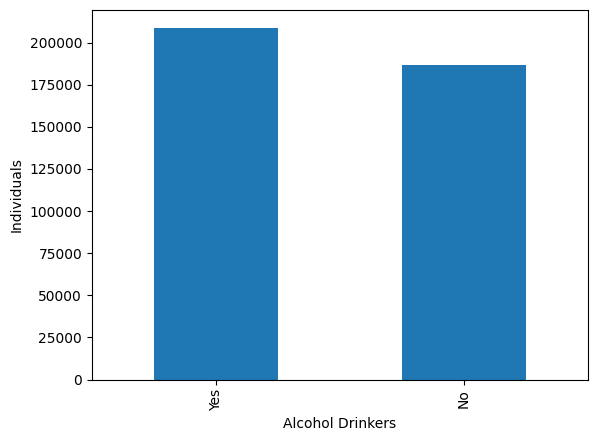

In [145]:
# AlcoholDrinkers
df_clean['AlcoholDrinkers'].value_counts().plot(kind='bar')
plt.xlabel("Alcohol Drinkers", fontsize=10)
plt.ylabel("Individuals", fontsize=10)

In [146]:
df_clean['AlcoholDrinkers'] = random_impute(df_clean['AlcoholDrinkers'])
df_clean['AlcoholDrinkers'].isnull().sum()

0

Text(0, 0.5, 'Individuals')

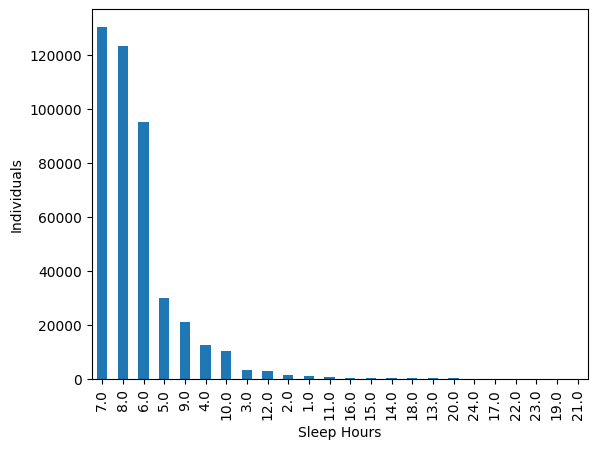

In [147]:
# SleepHours
df_clean['SleepHours'].value_counts().plot(kind='bar')
plt.xlabel("Sleep Hours", fontsize=10)
plt.ylabel("Individuals", fontsize=10)

In [148]:
df_clean['SleepHours'] = random_impute(df_clean['SleepHours'])
df_clean['SleepHours'].isnull().sum()

0

**MODE IMPUTATION**

Text(0, 0.5, 'Individuals')

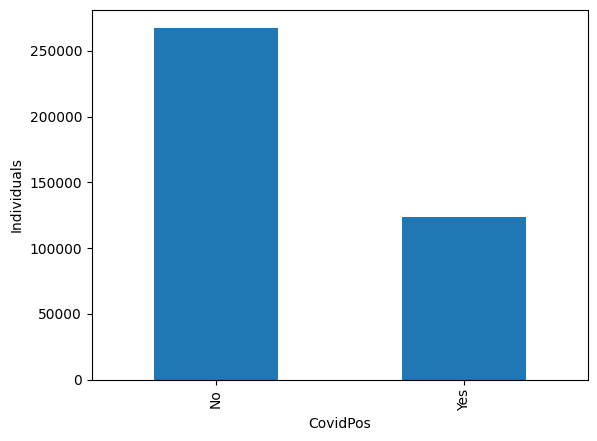

In [149]:
# CovidPos
df_clean['CovidPos'].value_counts().plot(kind='bar')
plt.xlabel("CovidPos", fontsize=10)
plt.ylabel("Individuals", fontsize=10)

In [150]:
df_clean['CovidPos'].fillna(value=df_clean['CovidPos'].mode()[0], inplace=True)
df_clean['CovidPos'].isnull().sum()

0

Text(0, 0.5, 'Individuals')

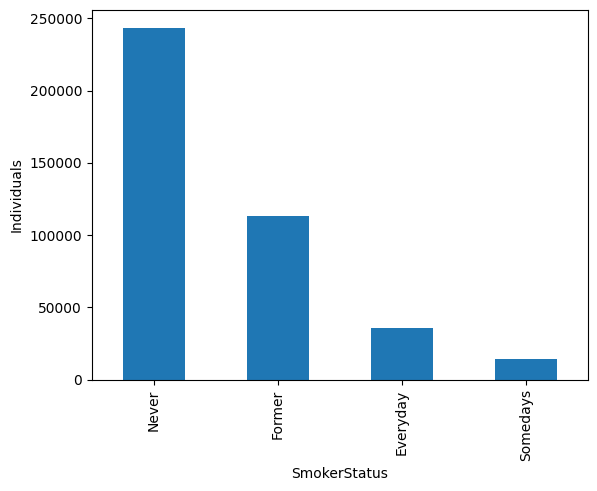

In [151]:
# SmokerStatus
df_clean['SmokerStatus'].value_counts().plot(kind='bar')
plt.xlabel("SmokerStatus", fontsize=10)
plt.ylabel("Individuals", fontsize=10)

In [152]:
df_clean['SmokerStatus'].fillna(value=df_clean['SmokerStatus'].mode()[0], inplace=True)
df_clean['SmokerStatus'].isnull().sum()

0

Text(0, 0.5, 'Individuals')

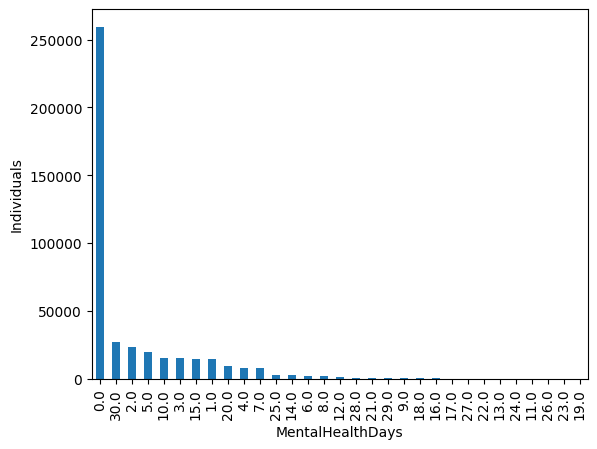

In [153]:
# MentalHealthDays
df_clean['MentalHealthDays'].value_counts().plot(kind='bar')
plt.xlabel("MentalHealthDays", fontsize=10)
plt.ylabel("Individuals", fontsize=10)

In [154]:
df_clean['MentalHealthDays'].fillna(value=df_clean['MentalHealthDays'].mode()[0], inplace=True)
df_clean['MentalHealthDays'].isnull().sum()

0

Text(0, 0.5, 'Individuals')

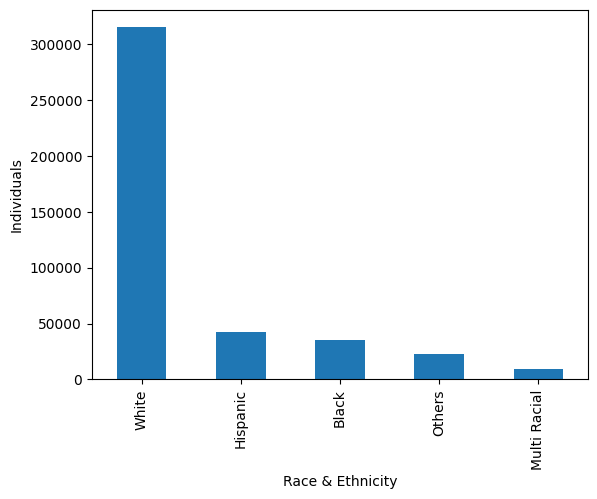

In [155]:
# RaceEthnicityCategory
df_clean['RaceEthnicityCategory'].value_counts().plot(kind='bar')
plt.xlabel("Race & Ethnicity", fontsize=10)
plt.ylabel("Individuals", fontsize=10)

In [27]:
df_clean['RaceEthnicityCategory'].fillna(value=df_clean['RaceEthnicityCategory'].mode()[0], inplace=True)
df_clean['RaceEthnicityCategory'].isnull().sum()

0

**CONTINUOUS COLUMS IMPUTATION**

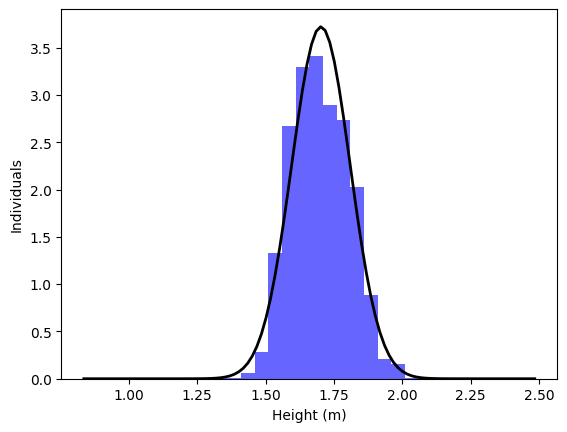

In [28]:
# HeightInMeters

plt.hist(df_clean['HeightInMeters'].dropna(), bins=30, density=True, alpha=0.6, color='blue')

# Fit a normal distribution to the data and calculate mean and standard deviation
mean, std = norm.fit(df_clean['HeightInMeters'].dropna())

# Plot the normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'black', linewidth=2)
plt.xlabel("Height (m)", fontsize=10)
plt.ylabel("Individuals", fontsize=10)

plt.show()

In [29]:
np.random.seed(42)

# Isolate non-missing values from the column
non_missing_values = df_clean['HeightInMeters'].dropna()

# Perform random imputation for missing values
df_clean['HeightInMeters'] = df_clean['HeightInMeters'].apply(
    lambda x: np.random.choice(non_missing_values) if pd.isnull(x) else x
)

df_clean['HeightInMeters'].isnull().sum()

0

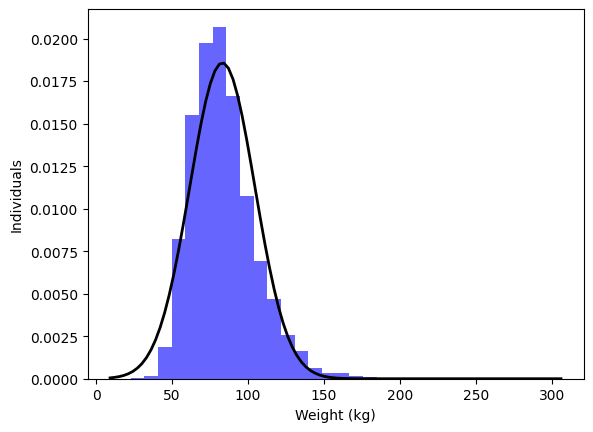

In [30]:
# WeightInKilograms

plt.hist(df_clean['WeightInKilograms'].dropna(), bins=30, density=True, alpha=0.6, color='blue')

# Fit a normal distribution to the data and calculate mean and standard deviation
mean, std = norm.fit(df_clean['WeightInKilograms'].dropna())

# Plot the normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("Weight (kg)", fontsize=10)
plt.ylabel("Individuals", fontsize=10)

plt.show()

In [31]:
knn = KNNImputer(n_neighbors=3, weights='distance')

In [32]:
df_clean['WeightInKilograms'] = knn.fit_transform(df_clean[['WeightInKilograms']])
df_clean['WeightInKilograms'].isnull().sum()

0

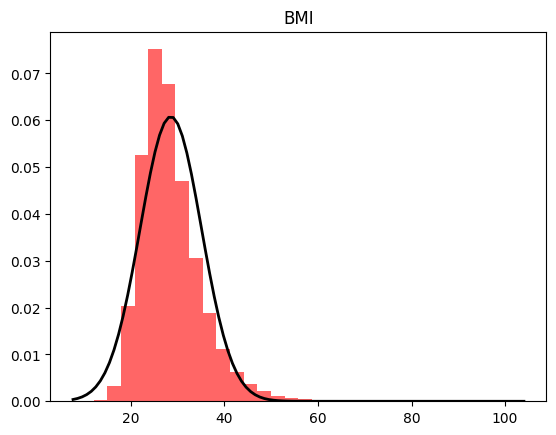

In [33]:
plt.hist(df_clean['BMI'].dropna(), bins=30, density=True, alpha=0.6, color='r')

# Fit a normal distribution to the data: Calculate mean and standard deviation
mean, std = norm.fit(df_clean['BMI'].dropna())

# Plot the normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=2)
plt.title('BMI')

plt.show()

In [34]:
df_clean['BMI'] = knn.fit_transform(df_clean[['BMI']])
df_clean['BMI'].isnull().sum()

0

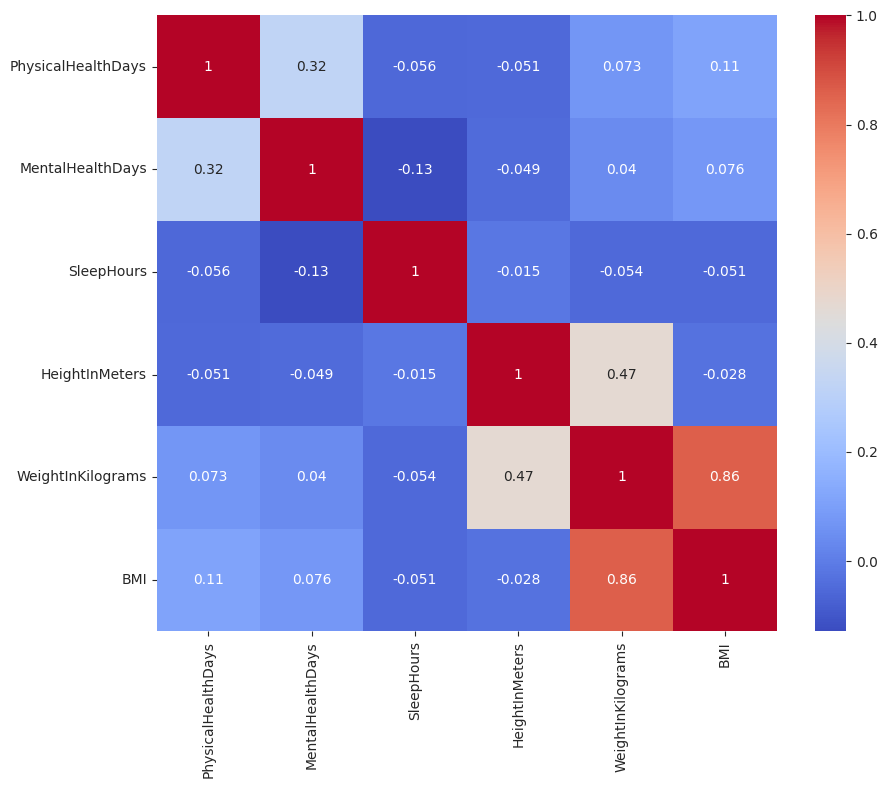

In [227]:
df_selected = df_clean.select_dtypes(include=['number'])
correlation_matrix = df_selected.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [175]:
df_clean.drop('WeightInKilograms', inplace=True, axis=1)

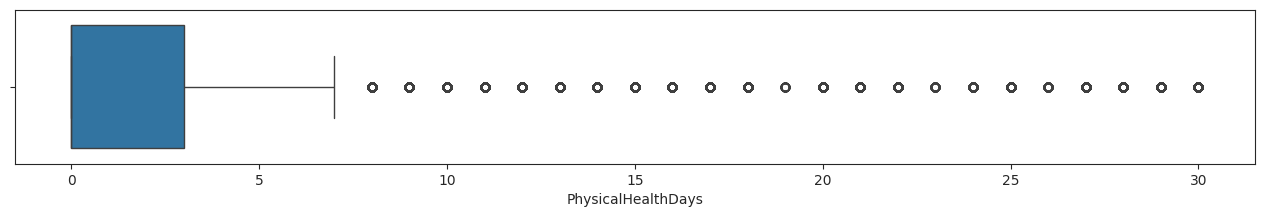

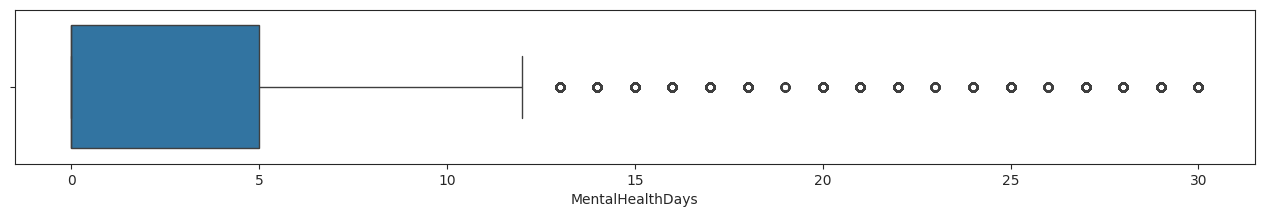

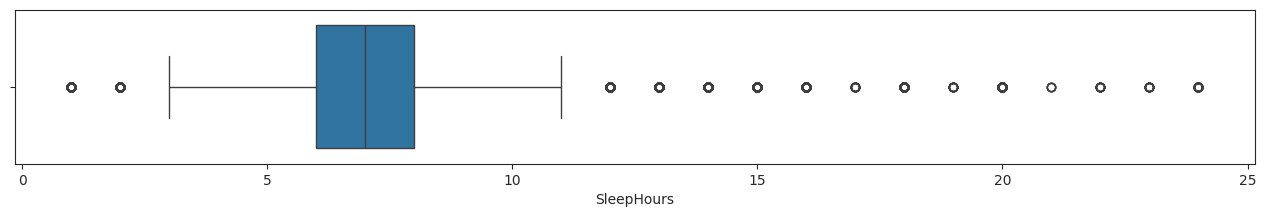

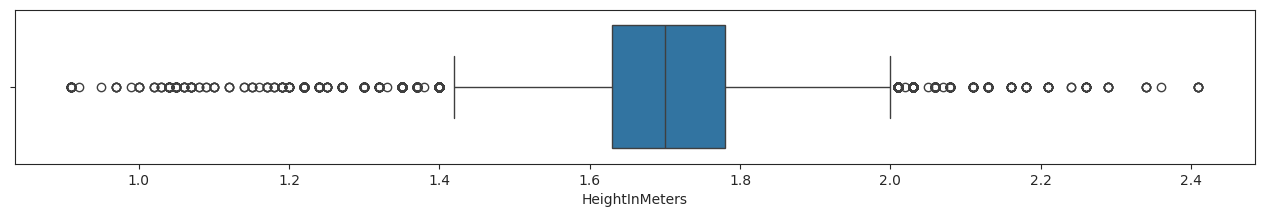

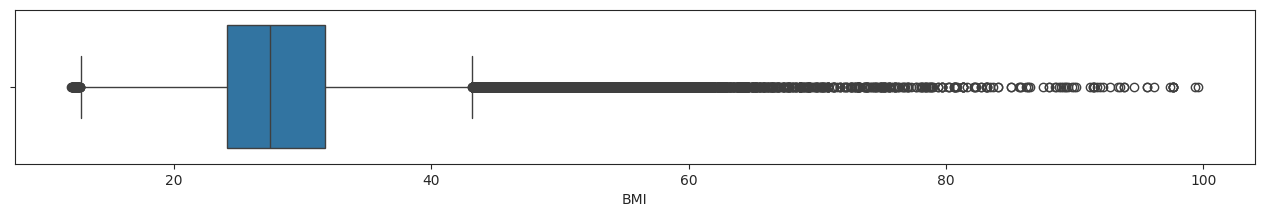

In [180]:
# finding outliers

for col in df_clean.describe().columns:
    sns.set_style('ticks')
    plt.figure(figsize=(16, 2))
    sns.boxplot(data=df_clean, x=col)
    plt.show()

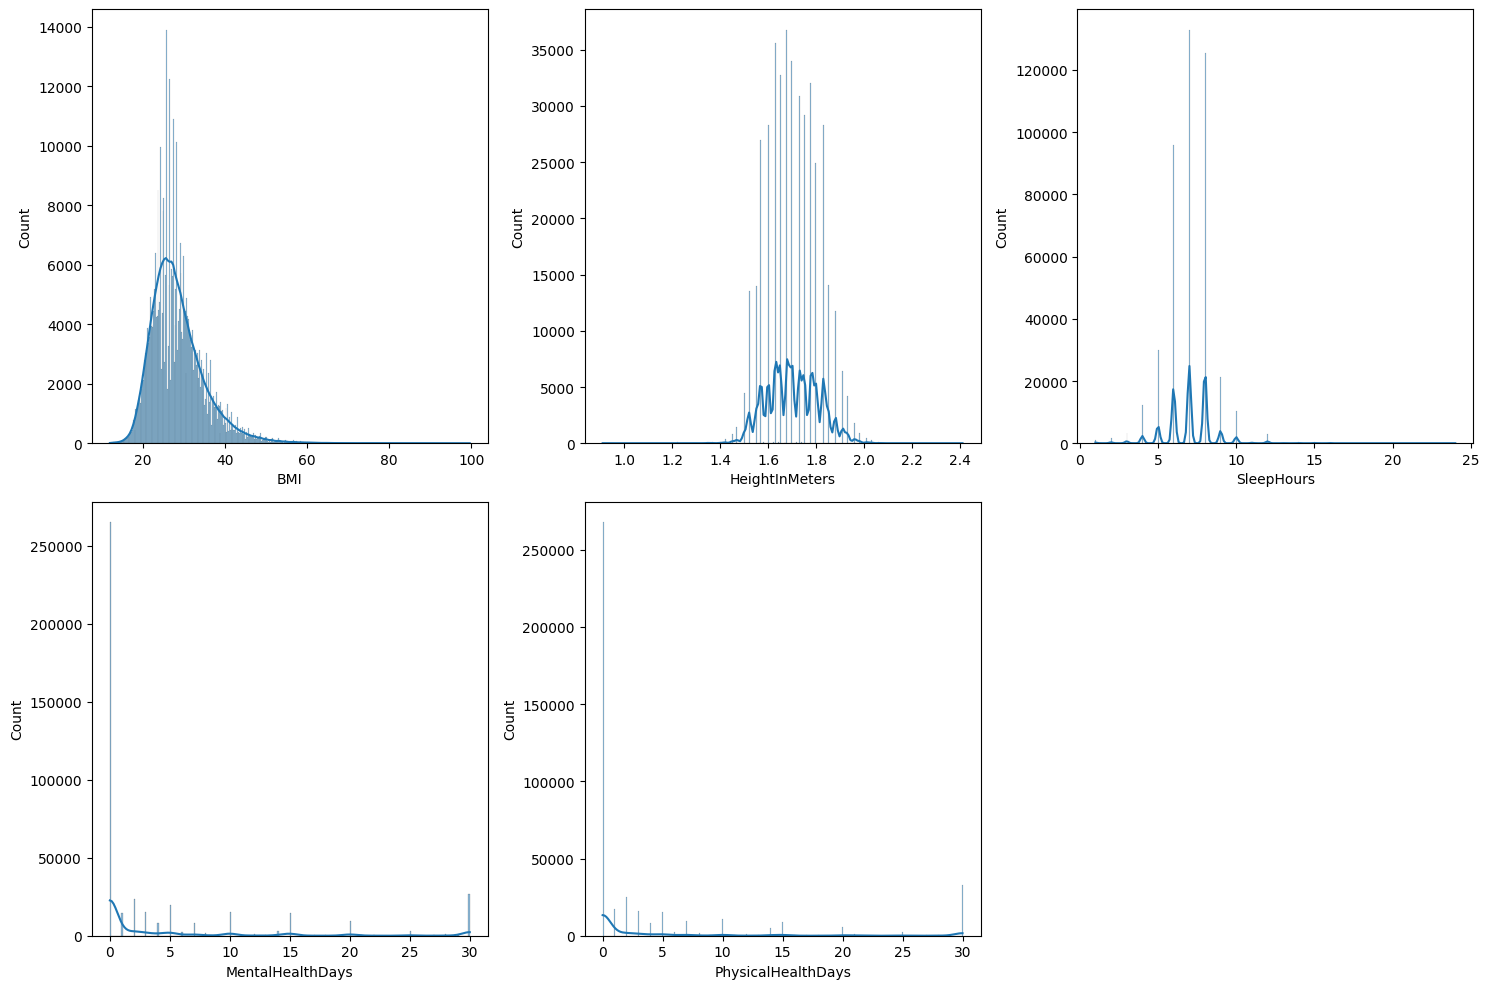

In [178]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.histplot(df_clean['BMI'], kde=True, ax=axes[0, 0])

sns.histplot(df_clean['HeightInMeters'], kde=True, ax=axes[0, 1])

sns.histplot(df_clean['SleepHours'], kde=True, ax=axes[0, 2])

sns.histplot(df_clean['MentalHealthDays'], kde=True, ax=axes[1, 0])

sns.histplot(df_clean['PhysicalHealthDays'], kde=True, ax=axes[1, 1])

fig.delaxes(axes[1][2])
plt.tight_layout()
plt.show()

In [183]:
#Function for extracting outliers in column of dataframe
def get_outliers(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3-Q1

    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)

    outliers = df_clean[(df_clean[column] < lower_limit) | (df_clean[column] > upper_limit)]

    return outliers, lower_limit, upper_limit

In [192]:
# SleepHours
sleep_hours_outliers, lower_sleep, upper_sleep = get_outliers(df_clean, 'SleepHours')

print(f"Lower Limit:{lower_sleep})\nUpper Limit:{upper_sleep})")

Lower Limit:3.0)
Upper Limit:11.0)


In [188]:
# Dropping records with sleep less than 3 hours
df_clean = df_clean.drop(df_clean[df_clean['SleepHours'] < 3].index)
df_clean.reset_index(drop=True, inplace=True)
df_clean.shape

(442429, 29)

In [197]:
# Dropping record with sleep greater than 16 hourss
df_clean = df_clean.drop(df_clean[df_clean['SleepHours'] > 12].index)
df_clean.reset_index(drop=True, inplace=True)
df_clean.shape

(440506, 29)

In [193]:
# HeightInMeters
height_outliers, lower_height, upper_height = get_outliers(df_clean, 'HeightInMeters')

print(f"Lower Limit:{lower_height})\nUpper Limit:{upper_height})")

Lower Limit:1.4049999999999998)
Upper Limit:2.0050000000000003)


In [195]:
# Dropping records with height less than 1.3 meters
df_clean = df_clean.drop(df_clean[df_clean['HeightInMeters'] < 1.3].index)
df_clean.reset_index(drop=True, inplace=True)
df_clean.shape

(441712, 29)

In [204]:
# Dropping records with height greater than 2.1 meters
df_clean = df_clean.drop(df_clean[df_clean['HeightInMeters'] > 2.1].index)
df_clean.reset_index(drop=True, inplace=True)
df_clean.shape

(28245, 29)

In [205]:
# BMI
BMI_outliers, lower_BMI, upper_BMI = get_outliers(df_clean, 'BMI')

print(f"Lower Limit:{lower_BMI})\nUpper Limit:{upper_BMI})")

Lower Limit:nan)
Upper Limit:nan)


In [206]:
# Dropping records with BMI less than 12
df_clean = df_clean.drop(df_clean[df_clean['HeightInMeters'] < 12].index)
df_clean.reset_index(drop=True, inplace=True)
df_clean.shape

(28245, 29)